<a href="https://colab.research.google.com/github/anirbansen3027/feature-engineering/blob/master/6_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outliers
An outlier is a data point which is significantly different from the remaining data.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)


1.   AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.
2.   Decision trees tend to ignore the presence of outliers when creating the branches of their trees.
3.    Linear models, in particular Linear Regression, can be sensitive to outliers.



**Predicting Survival on the Titanic: understanding society behaviour and beliefs**
https://www.kaggle.com/c/titanic/data

In [0]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

#Colab's file access feature
from google.colab import files
#retrieve uploaded file
uploaded = files.upload()
#move kaggle.json into the file where the api expects it to be there
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!kaggle competitions download -c titanic
!ls

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 48.5MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 974kB/s]
gender_submission.csv  sample_data  test.csv  train.csv


In [0]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1.Fare**

Text(0, 0.5, 'Number of customers')

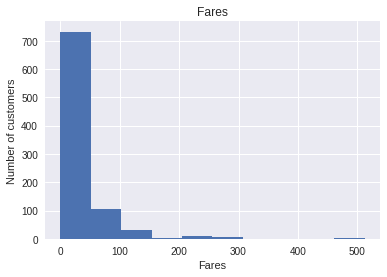

In [0]:
# First let's plot a histogram to get an idea of the distribution
fig = data.Fare.hist()
fig.set_title('Fares')
fig.set_xlabel('Fares')
fig.set_ylabel('Number of customers')

The distribution of Fare is skewed, so in principle, we shouldn't estimate outliers using the mean plus minus 3 standard deviations methods, which assumes a normal distribution of the data.

Text(0, 0.5, 'Fare')

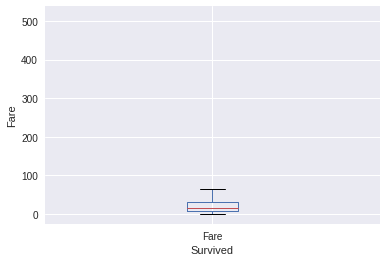

In [0]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [0]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
LowerBound = data.Fare.quantile(0.25) - (IQR*1.5)
UpperBound = data.Fare.quantile(0.75) + (IQR*1.5)
IQR,LowerBound,UpperBound

(23.0896, -26.724, 65.6344)

In [0]:
# And if we are looking at really extreme values
# using the interquantile proximity rule
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
LowerBound = data.Fare.quantile(0.25) - (IQR*3)
UpperBound = data.Fare.quantile(0.75) + (IQR*3)
IQR,LowerBound,UpperBound

(23.0896, -61.358399999999996, 100.2688)

In [0]:
# lets look at the actual number of passengers on the upper Fare ranges
print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0]))

total passengers: 891
passengers that paid more than 65: 116
passengers that paid more than 100: 53


In [0]:
# and percentages of passengers
total_passengers = np.float(data.shape[0])
print('Total passengers: {}', format(data.shape[0]/total_passengers))
print('Percentage of passengers that paid more than 65: {}'.format(data[data.Fare > 65].shape[0]/total_passengers))
print('Percentage of passengers that paid more than 100: {}'.format(data[data.Fare > 100].shape[0]/total_passengers))

Total passengers: {} 1.0
Percentage of passengers that paid more than 65: 0.13019079685746351
Percentage of passengers that paid more than 100: 0.05948372615039282


The upper boundary for extreme outliers is a cost of 100 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

**Age**

Text(0, 0.5, 'Number of customers')

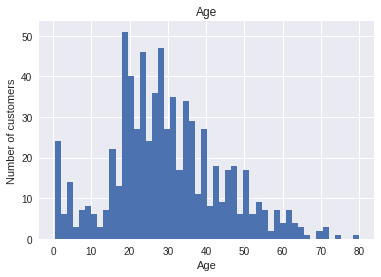

In [0]:
# First let's plot a histogram to get an idea of the distribution
fig = data.Age.hist(bins = 50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('Number of customers')

Text(0, 0.5, 'Age')

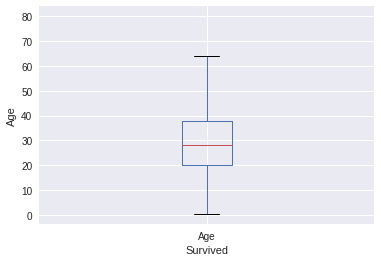

In [0]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [0]:
# let's visualise median and quantiles

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
LowerBound = data.Age.quantile(0.25) - (IQR*1.5)
UpperBound = data.Age.quantile(0.75) + (IQR*1.5)
IQR,LowerBound,UpperBound

(17.875, -6.6875, 64.8125)

In [0]:
# And if we are looking at really extreme values
# using the interquantile proximity rule
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
LowerBound = data.Age.quantile(0.25) - (IQR*3)
UpperBound = data.Age.quantile(0.75) + (IQR*3)
IQR,LowerBound,UpperBound

(17.875, -33.5, 91.625)

In [0]:
# and percentages of passengers
total_passengers = np.float(data.shape[0])
print('Total passengers: {}', format(data.shape[0]/total_passengers))
print('Percentage of passengers that Age more than 65: {}'.format(data[data.Age > 65].shape[0]/total_passengers))
print('Percentage of passengers that Age more than 91: {}'.format(data[data.Age > 92].shape[0]/total_passengers))

Total passengers: {} 1.0
Percentage of passengers that Age more than 65: 0.008978675645342313
Percentage of passengers that Age more than 91: 0.0


In [0]:
# Let's calculate the boundaries outside which sit the outliers
# assuming Age follows a Gaussian distribution

Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()

Upper_boundary, Lower_boundary

(73.27860964406095, -13.88037434994331)

In [0]:
print('Percentage of passengers that Age more than 73: {}'.format(data[data.Age > 73].shape[0]/total_passengers))

Percentage of passengers that Age more than 73: 0.002244668911335578


Roughly ~1-2 percent of the passengers were extremely old.

In [0]:
data[data['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


We can see that the majority of the outliers did not survive.

**Measuring the effect of outliers on different machine learning algorithms**

In [0]:
#importing Classifier Libaries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
#roc_auc_score for measuring the accuracy of our model and train_test_split for splitting our data
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [33]:
# let's find out if the variables contain missing data
data[['Fare','Age']].isnull().mean()

Fare    0.000000
Age     0.198653
dtype: float64

Age contains 20 % of missing data. For simplicity, I will fill the missing values with 0.

In [34]:
# let's separate into training and testing set
# remember that to avoid overfitting and improve generalisation
# machine learning models need to be built on a train set
# and evaluated on a test set
X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']].fillna(0),
    data.Survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [0]:
# Let's generate training and testing sets without outliers
# For simplicity, I will replace outliers by the upper boundary values
# this procedure is called capping or top-coding and I will cover it
# extensively in the section of handling outliers later in the course

# let's create a new dataset
data_clean = data.copy()

# replace outliers in Age
# using the boundary from the Gaussian assumption method
data_clean.loc[data_clean.Age >= 63, 'Age'] = 73

# replace outliers in Fare
# using the boundary of the interquantile range method
data_clean.loc[data_clean.Fare >= 100, 'Fare'] = 100

# Let's divide into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    data_clean[['Age', 'Fare']].fillna(0),
    data_clean.Survived,
    test_size=0.3,
    random_state=0)

**Outlier effect on Logistic Regression:**

In [39]:
# model build on data with outliers
logReg = LogisticRegression(random_state=44)
# train model
logReg.fit(X_train, y_train)
# make predicion on test set
pred = logReg.predict_proba(X_test)
print('LogReg Accuracy: {}'.format(logReg.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

LogReg Accuracy: 0.6940298507462687
LogReg roc-auc: 0.7132142857142858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# model build on data without outliers
logReg = LogisticRegression(random_state=44)
# train model
logReg.fit(X_train_clean, y_train_clean)
# make predicion on test set
pred = logReg.predict_proba(X_test_clean)
print('LogReg Accuracy: {}'.format(logReg.score(X_test_clean, y_test_clean)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

LogReg Accuracy: 0.7089552238805971
LogReg roc-auc: 0.7138095238095238


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Outlier Effect on Adaboost:**

In [41]:
# model built on data with outliers
# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)
# train model
ada.fit(X_train, y_train)
# make predictions
pred = ada.predict_proba(X_test)
print('AdaBoost Accuracy: {}'.format(ada.score(X_test, y_test)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

AdaBoost Accuracy: 0.7201492537313433
AdaBoost roc-auc: 0.7464583333333333


In [42]:
# model built on data with outliers
# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)
# train model
ada.fit(X_train_clean, y_train_clean)
# make predictions
pred = ada.predict_proba(X_test_clean)
print('AdaBoost Accuracy: {}'.format(ada.score(X_test_clean, y_test_clean)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:, 1])))

AdaBoost Accuracy: 0.7126865671641791
AdaBoost roc-auc: 0.757827380952381


We can see how removing outliers improves the performance of Adaboost: 0.758 vs 0.746 roc-auc.

**Outlier Effect on Random Forests:**


In [43]:
# model built on data with outliers
# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)
# train model
rf.fit(X_train, y_train)
# make predictions
pred = rf.predict_proba(X_test)
print('Random Forests Accuracy: {}'.format(rf.score(X_test, y_test)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Random Forests Accuracy: 0.7089552238805971
Random Forests roc-auc: 0.732827380952381


In [45]:
# model built on data with outliers
# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)
# train model
rf.fit(X_train_clean, y_train_clean)
# make predictions
pred = rf.predict_proba(X_test_clean)
print('Random Forests Accuracy: {}'.format(rf.score(X_test_clean, y_test_clean)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:, 1])))

Random Forests Accuracy: 0.6940298507462687
Random Forests roc-auc: 0.7259523809523809
